# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import joblib

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


# Load Dataset

In [ ]:
data = pd.read_csv("adult.csv")



# Data Overview

In [ ]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
data.shape

(32561, 15)

# Data Preprocessing

## Identify categorical and numerical features


In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
Numerical features: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


## Preprocess Categorical Features

### Replace missing values '?' with mode for categorical columns


In [ ]:
for col in categorical_features:
    data[col] = data[col].replace('?', data[col].mode()[0])

### Initialize OneHotEncoder


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
encoder

OneHotEncoder(handle_unknown='ignore')

### Fit and transform categorical features

In [ ]:
encoded_features = encoder.fit_transform(data[categorical_features])

### Convert sparse matrix to DataFrame


In [ ]:
encoded_data = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))
encoded_data

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Concatenate with original DataFrame (dropping original categorical columns)

In [ ]:
data_processed = pd.concat([data.drop(columns=categorical_features), encoded_data], axis=1)
data_processed

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,90,77053,9,0,4356,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,82,132870,9,0,4356,18,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,66,186061,10,0,4356,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,54,140359,4,0,3900,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,41,264663,10,0,3900,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32557,27,257302,12,0,0,38,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32558,40,154374,9,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32559,58,151910,9,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Preprocess Numerical Features

### Select only the numerical columns from the df DataFrame

In [ ]:
numerical_data = data[numerical_features]
numerical_data

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


### Instantiate a StandardScaler object

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

### Fit the scaler to the selected numerical features and transform them


In [ ]:
scaled_numerical_features = scaler.fit_transform(numerical_data)

# Convert scaled numerical features back to a DataFrame
scaled_numerical_data = pd.DataFrame(scaled_numerical_features, columns=numerical_features)

### Replace the original numerical columns in df_processed with the scaled numerical features

In [ ]:
# Drop the original numerical columns from data_processed
data_processed = data_processed.drop(columns=numerical_features)

# Concatenate the scaled numerical features with data_processed
data_processed = pd.concat([scaled_numerical_data, data_processed], axis=1)
data_processed

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,1.140460,-0.031360,-0.14592,-0.216660,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32557,-0.849080,0.639741,0.746039,-0.14592,-0.216660,-0.197409,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32558,0.103983,-0.335433,-0.420060,-0.14592,-0.216660,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32559,1.423610,-0.358777,-0.420060,-0.14592,-0.216660,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Split The Data

In [ ]:
# Define features (X) and target variable (y)
X = data_processed.drop(columns=['income_<=50K', 'income_>50K'])
y = data_processed['income_>50K']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26048, 105)
Shape of X_test: (6513, 105)
Shape of y_train: (26048,)
Shape of y_test: (6513,)


# Training Models

## Logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred)
precision_log_reg = precision_score(y_test, y_pred)
recall_log_reg = recall_score(y_test, y_pred)
f1_log_reg = f1_score(y_test, y_pred)

print(f"Logistic Regression - Accuracy: {accuracy_log_reg * 100:.2f}%")
print(f"Logistic Regression - Precision: {precision_log_reg * 100:.2f}%")
print(f"Logistic Regression - Recall: {recall_log_reg * 100:.2f}%")
print(f"Logistic Regression - F1-Score: {f1_log_reg * 100:.2f}%")

Logistic Regression - Accuracy: 85.26%
Logistic Regression - Precision: 73.82%
Logistic Regression - Recall: 60.08%
Logistic Regression - F1-Score: 66.24%


In [ ]:
class_names = ['<=50K', '>50K']

print("Classification Report - Logistic Regression: \n\n", classification_report(y_test, y_pred, target_names=class_names))

Classification Report - Logistic Regression: 

               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4945
        >50K       0.74      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



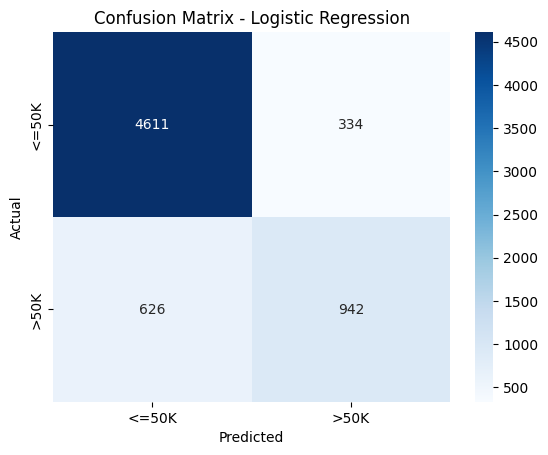

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Decision Tree Classifier

In [ ]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dec_tree.predict(X_test)

accuracy_dec_tree = accuracy_score(y_test, y_pred)
precision_dec_tree = precision_score(y_test, y_pred)
recall_dec_tree = recall_score(y_test, y_pred)
f1_dec_tree = f1_score(y_test, y_pred)

print(f"DT Accuracy: {accuracy_dec_tree * 100:.2f}%")
print(f"DT Precision: {precision_dec_tree * 100:.2f}%")
print(f"DT Recall: {recall_dec_tree * 100:.2f}%")
print(f"DT F1-Score: {f1_dec_tree * 100:.2f}%")

DT Accuracy: 81.51%
DT Precision: 61.08%
DT Recall: 63.97%
DT F1-Score: 62.49%


In [ ]:
class_names = ['<=50K', '>50K']

print("Classification Report - DT: \n\n", classification_report(y_test, y_pred, target_names=class_names))

Classification Report - DT: 

               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      4945
        >50K       0.61      0.64      0.62      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.75      6513
weighted avg       0.82      0.82      0.82      6513



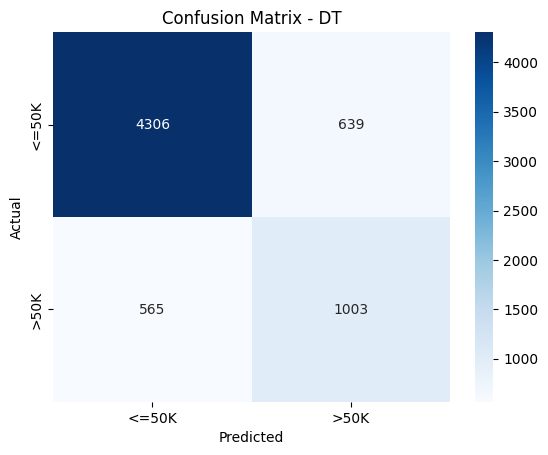

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - DT')
plt.show()

## Random Forest Classifier

In [ ]:
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rand_forest.predict(X_test)

accuracy_rand_forest = accuracy_score(y_test, y_pred)
precision_rand_forest = precision_score(y_test, y_pred)
recall_rand_forest = recall_score(y_test, y_pred)
f1_rand_forest = f1_score(y_test, y_pred)

print(f"RF Accuracy: {accuracy_rand_forest * 100:.2f}%")
print(f"RF Precision: {precision_rand_forest * 100:.2f}%")
print(f"RF Recall: {recall_rand_forest * 100:.2f}%")
print(f"RF F1-Score: {f1_rand_forest * 100:.2f}%")

RF Accuracy: 85.08%
RF Precision: 72.51%
RF Recall: 61.22%
RF F1-Score: 66.39%


In [ ]:
class_names = ['<=50K', '>50K']

print("Classification Report - RF: \n\n", classification_report(y_test, y_pred, target_names=class_names))

Classification Report - RF: 

               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4945
        >50K       0.73      0.61      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.85      6513



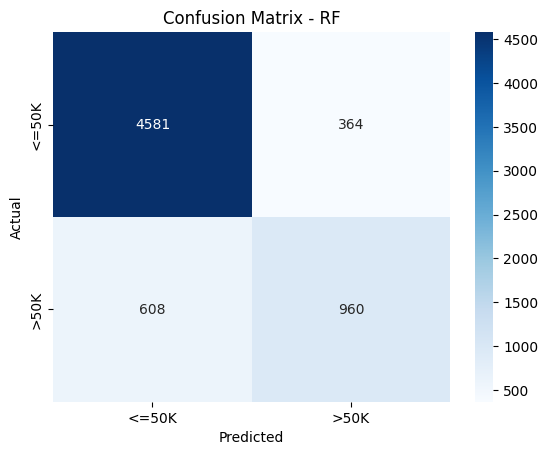

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RF')
plt.show()

## XGBoost Classifier

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(f"XGBoost Precision: {precision_xgb * 100:.2f}%")
print(f"XGBoost Recall: {recall_xgb * 100:.2f}%")
print(f"XGBoost F1-Score: {f1_xgb * 100:.2f}%")

XGBoost Accuracy: 86.93%
XGBoost Precision: 77.43%
XGBoost Recall: 64.54%
XGBoost F1-Score: 70.40%


In [ ]:
class_names = ['<=50K', '>50K']
print("Classification Report - XGBoost: \n\n", classification_report(y_test, y_pred_xgb, target_names=class_names))

Classification Report - XGBoost: 

               precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      4945
        >50K       0.77      0.65      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.86      0.87      0.87      6513



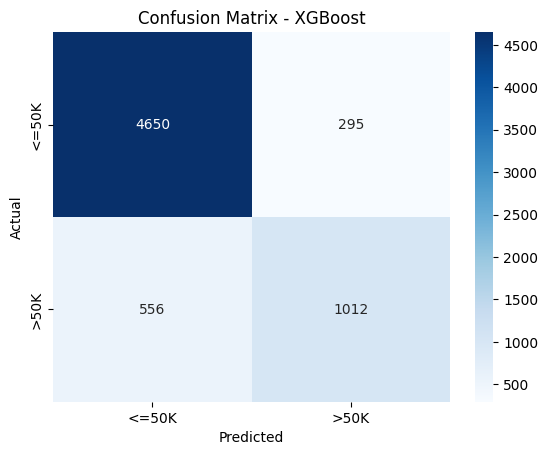

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

## Voting Classifier

In [ ]:
# Create a list of tuples with model names and trained model objects
estimators = [
    ('logistic_regression', log_reg),
    ('decision_tree', dec_tree),
    ('random_forest', rand_forest),
    ('xgboost', xgb_clf)
]

# Instantiate the VotingClassifier
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_by...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))])

In [ ]:
y_pred = voting_clf.predict(X_test)

accuracy_voting_clf = accuracy_score(y_test, y_pred)
precision_voting_clf = precision_score(y_test, y_pred)
recall_voting_clf = recall_score(y_test, y_pred)
f1_voting_clf = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy_voting_clf * 100:.2f}%")
print(f"Precision: {precision_voting_clf * 100:.2f}%")
print(f"Recall: {recall_voting_clf * 100:.2f}%")
print(f"F1-Score: {f1_voting_clf * 100:.2f}%")

Accuracy: 86.58%
Precision: 80.98%
Recall: 57.84%
F1-Score: 67.49%


In [ ]:
class_names = ['<=50K', '>50K']

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92      4945
        >50K       0.81      0.58      0.67      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.77      0.80      6513
weighted avg       0.86      0.87      0.86      6513



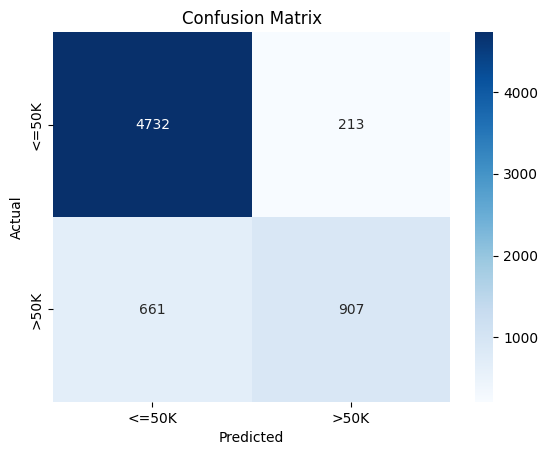

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save The Trained Models


In [ ]:
joblib.dump(log_reg, f'logistic_regression_model_acc{accuracy_log_reg * 100:.2f}.pkl')
joblib.dump(dec_tree, f'decision_tree_model_acc{accuracy_dec_tree * 100:.2f}.pkl')
joblib.dump(rand_forest, f'random_forest_model_acc{accuracy_rand_forest * 100:.2f}.pkl')
joblib.dump(xgb_clf, f'xgboost_model_acc{accuracy_xgb * 100:.2f}.pkl')
joblib.dump(voting_clf, f'voting_classifier_model_acc{accuracy_voting_clf * 100:.2f}.pkl')

print("Trained models saved successfully!")

Trained models saved successfully!
